# Operações lógicas em imagens
## Aula 8

* Operações lógicas **E** (AND), **OU** (OR), **NÃO** (NOT) e **XOU** (XOR);
* E, OU e NÃO também são frequentemente chamadas de **interseção**, **união** e **complemento**, respectivamente;
* Normalmente são utilizadas **imagens binárias** para estas operações;
* Operam bit a bit em cada valor dentro do array.

### Aplicações
Dentre algumas aplicações, temos:
* Inverter as cores de uma imagem;
* Interseção de duas imagens;
* União de duas imagens;
* Detectar mudanças em imagens;
* Extrair ROIs de imagens (Region of Interest ou Região de Interesse);
* Etc.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

Vamos primeiro aplicar um threshold às seguintes imagens para torná-las binárias:

In [3]:
# Mais uma forma de aplicar threshold:
def threshold(img, thresh):
    out = img.copy()
    out[img >  thresh] = 255
    out[img <= thresh] = 0
    return out

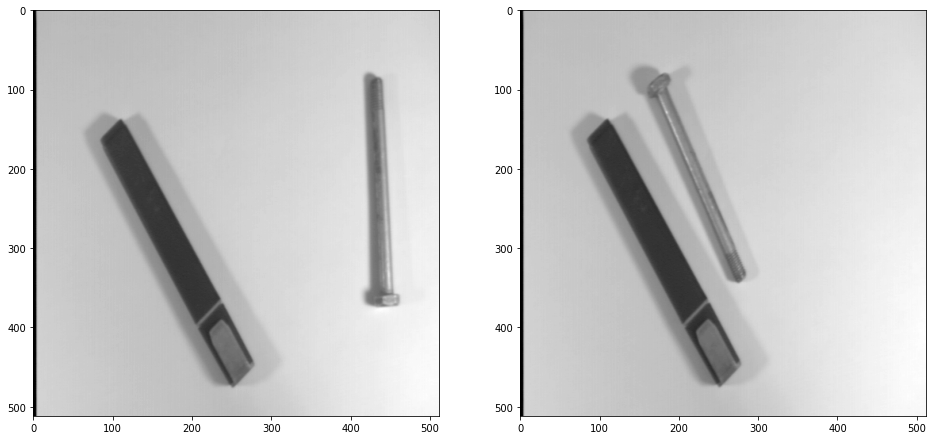

In [4]:
scene1 = np.array(Image.open("scene1.gif"))
scene2 = np.array(Image.open("scene2.gif"))

plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.imshow(scene1, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(scene2, cmap='gray')

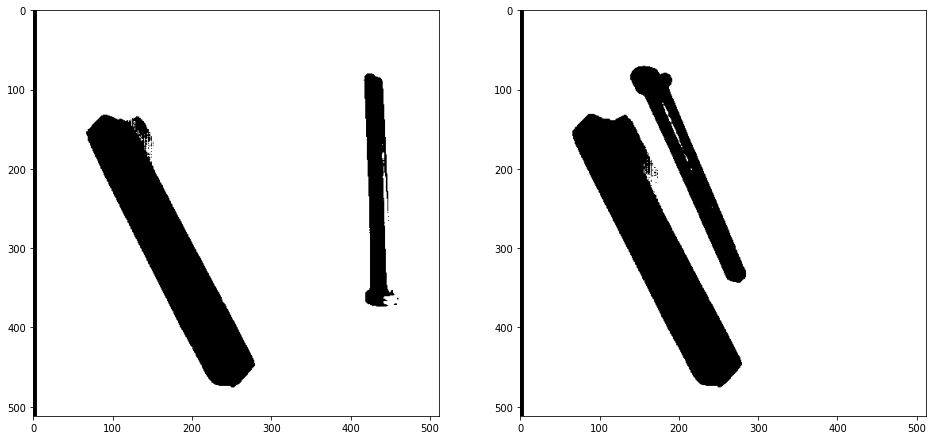

In [5]:
bin1 = threshold(scene1, 63)
bin2 = threshold(scene2, 63)

plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.imshow(bin1, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(bin2, cmap='gray')

## Operações lógicas
### NOT


| A | Q |
|---|---|
| 0 | 1 |
| 1 | 0 |

* Realiza o complemento pixel a pixel de uma imagem;
* Uperação **unária** (há apenas uma entrada);
* Como saída, se obtem a imagem "negativa".

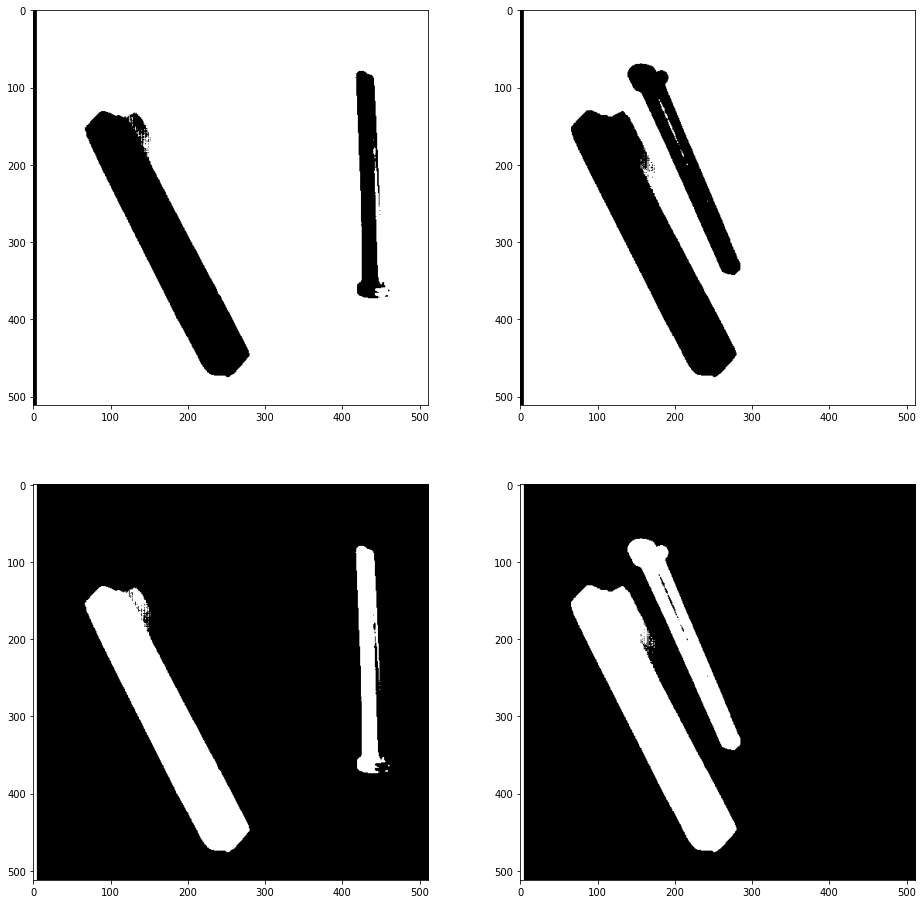

In [6]:
# bitwise_not e invert têm o mesmo efeito:
bin1_not = np.bitwise_not(bin1)
bin2_not = np.invert(bin2)

plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.imshow(bin1, cmap='gray')
plt.subplot(2, 2, 2)
plt.imshow(bin2, cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(bin1_not, cmap='gray')
plt.subplot(2, 2, 4)
plt.imshow(bin2_not, cmap='gray')

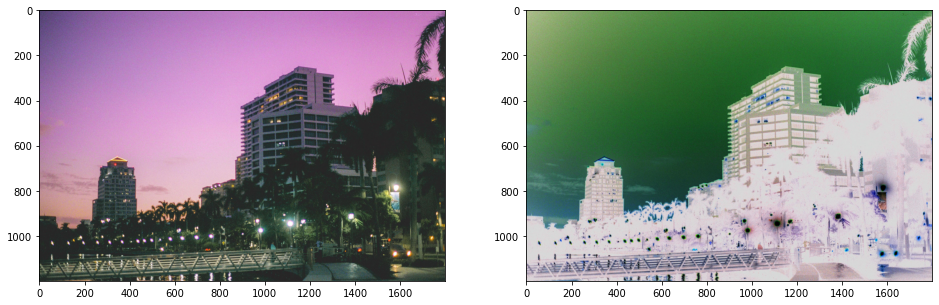

In [7]:
img_building = np.array(Image.open("building.jpg"))[:, :, :3]

img_building_not = np.invert(img_building)
# Ou:
#img_building_not = np.bitwise_not(img_building)
# Ou:
#img_building_not = 255 - img_building
# Ou:
#img_building_not = ~img_building

plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.imshow(img_building)
plt.subplot(1, 2, 2)
plt.imshow(img_building_not)

## AND


| A | B | Q |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

* Calcula a interseção de duas imagens;
* Em outras palavras, calcula o que é comum entre duas imagens;
* Mais evidente em imagens binárias;
* Também pode ser utilizada para recortar parte de uma imagem.

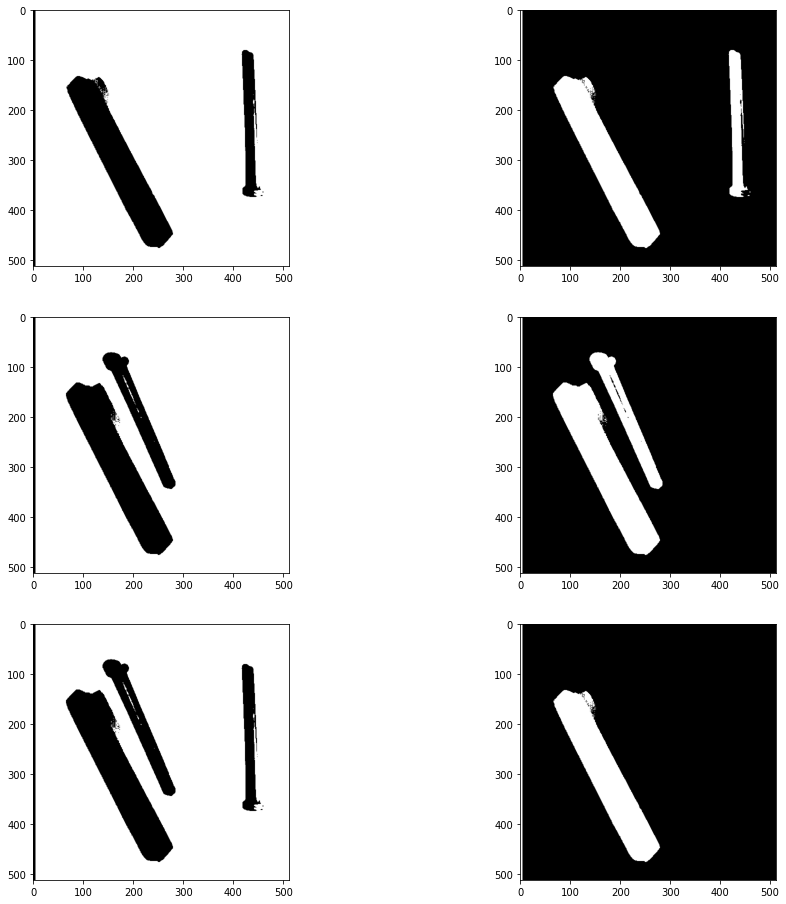

In [8]:
bin_and = np.bitwise_and(bin1, bin2)
# Ou:
#bin_and = bin1 & bin2

bin_and_2 = bin1_not & bin2_not
# Ou:
#bin_and_2 = np.bitwise_and(bin1_not, bin2_not)

plt.figure(figsize=(16, 16))
plt.subplot(3, 2, 1)
plt.imshow(bin1, cmap='gray')
plt.subplot(3, 2, 2)
plt.imshow(bin1_not, cmap='gray')

plt.subplot(3, 2, 3)
plt.imshow(bin2, cmap='gray')
plt.subplot(3, 2, 4)
plt.imshow(bin2_not, cmap='gray')

plt.subplot(3, 2, 5)
plt.imshow(bin_and, cmap='gray')
plt.subplot(3, 2, 6)
plt.imshow(bin_and_2, cmap='gray')

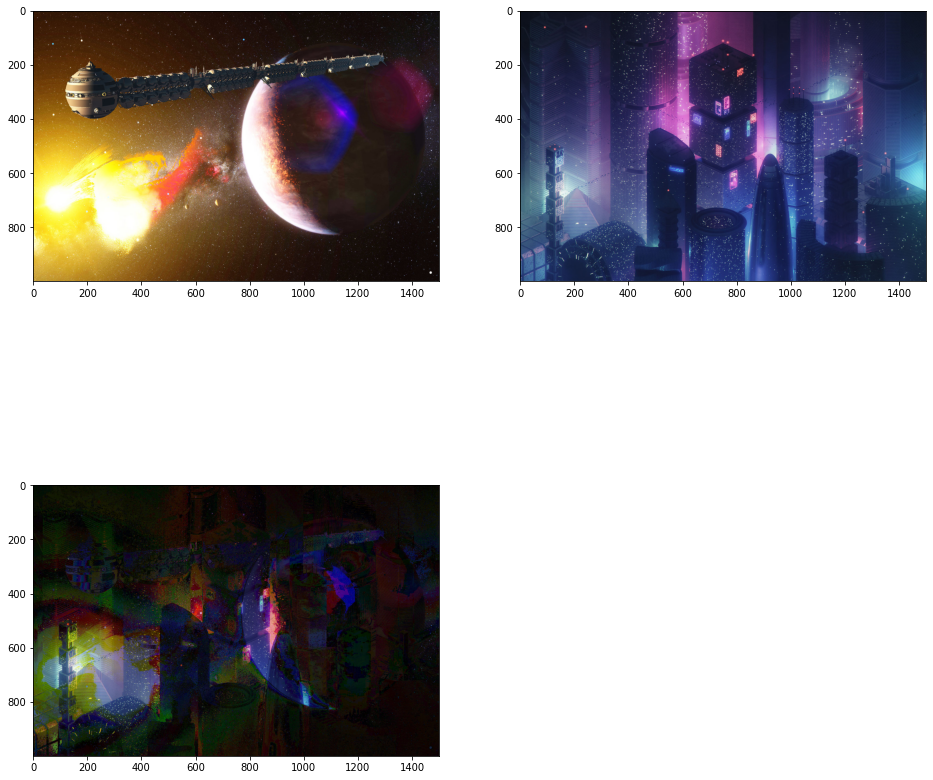

In [9]:
img1 = np.array(Image.open("img1.jpg"))[:, :, :3]
img2 = np.array(Image.open("img2.jpg"))[:, :, :3]

img_and = img1 & img2

plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.imshow(img1)
plt.subplot(2, 2, 2)
plt.imshow(img2)
plt.subplot(2, 2, 3)
plt.imshow(img_and)

### Máscara de bits
* É possível recortar uma região de interesse de uma imagem utilizando a operação AND com uma imagem binária;
* As regiões em que se deseja mostrar a imagem devem conter (<font color="red">255</font>, <font color="green">255</font>, <font color="blue">255</font>) (ou simplesmente 255 em uma imagem binária), e (<font color="red">0</font>, <font color="green">0</font>, <font color="blue">0</font>) (ou simplesmente 0 em uma imagem binária) nas coordenadas em que se deseja ocultar a imagem;
* Assim, a imagem resultante terá (<font color="red">0</font>, <font color="green">0</font>, <font color="blue">0</font>) nas coordenadas ocultas e manterá a cor original nas demais coordenadas.

Número de linhas: 1200
Número de colunas: 1800
Linhas em branco: de 300 até 900
Colunas em branco: de 450 até 1350


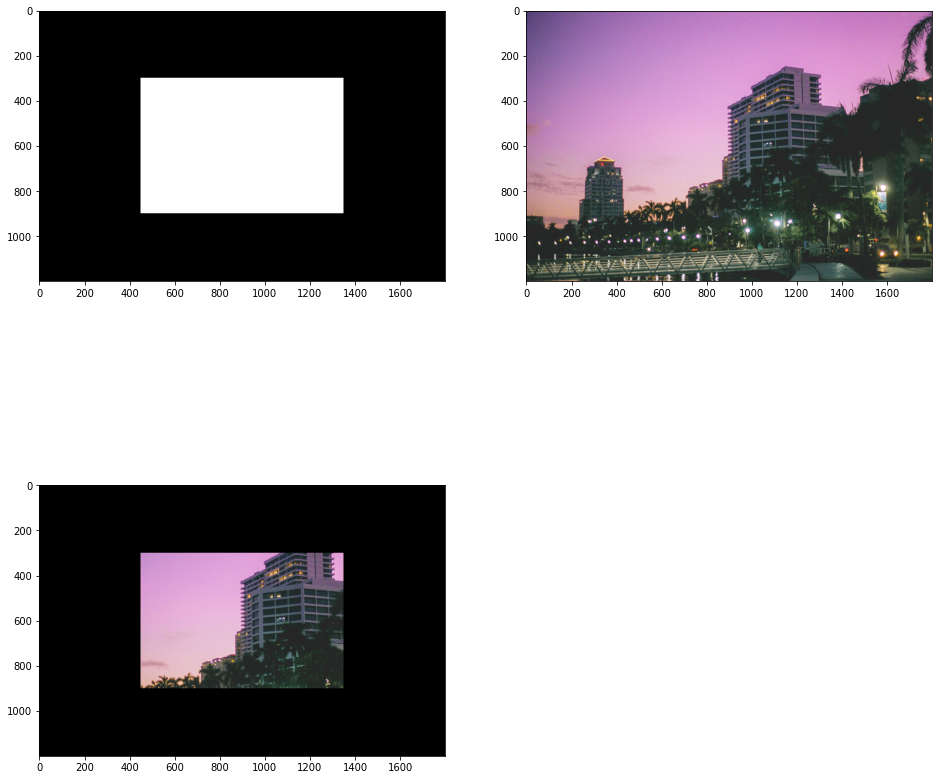

In [10]:
mask = np.zeros(shape=img_building.shape, dtype=np.uint8)
mask[img_building.shape[0] // 4:img_building.shape[0] * 3 // 4,
     img_building.shape[1] // 4:img_building.shape[1] * 3 // 4,
     :] = 255

print('Número de linhas: {}'.format(img_building.shape[0]))
print('Número de colunas: {}'.format(img_building.shape[1]))
print('Linhas em branco: de {} até {}'.format(img_building.shape[0] // 4, img_building.shape[0] * 3 // 4))
print('Colunas em branco: de {} até {}'.format(img_building.shape[1] // 4, img_building.shape[1] * 3 // 4))

img_building_masked = img_building & mask

plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.imshow(mask)
plt.subplot(2, 2, 2)
plt.imshow(img_building)
plt.subplot(2, 2, 3)
plt.imshow(img_building_masked)

## OR


| A | B | Q |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 1 |

* Calcula a união de duas imagens;
* Mais evidente em imagens binárias.

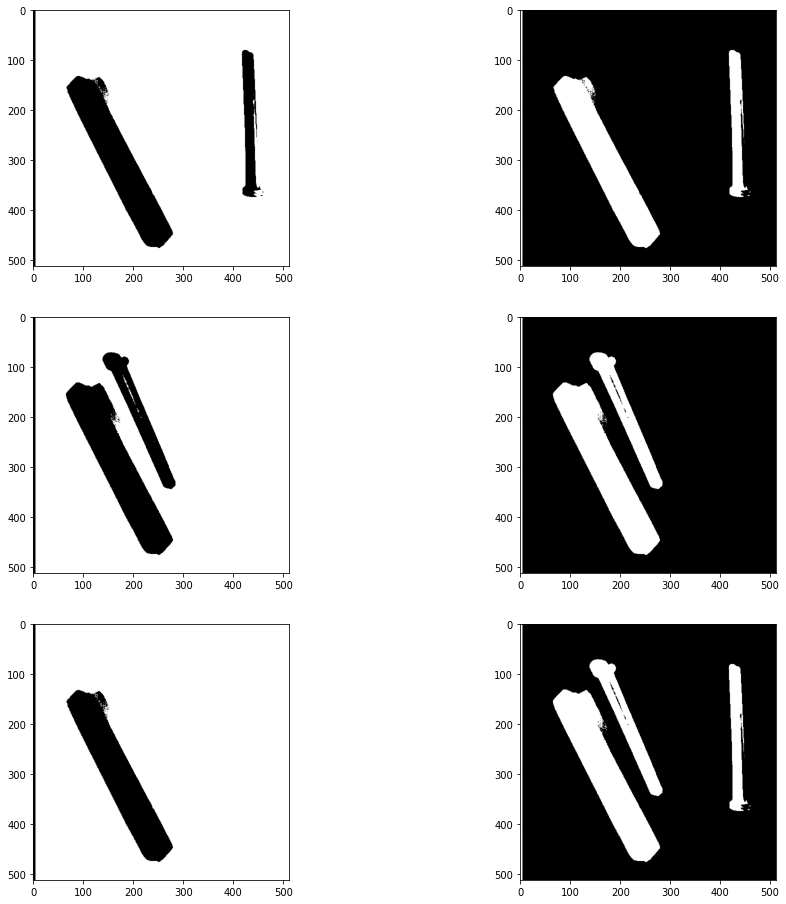

In [11]:
bin_or = np.bitwise_or(bin1, bin2)
# Ou:
#bin_or = bin1 | bin2

bin_or_2 = bin1_not | bin2_not
# Ou:
#bin_or_2 = np.bitwise_or(bin1_not, bin2_not)

plt.figure(figsize=(16, 16))
plt.subplot(3, 2, 1)
plt.imshow(bin1, cmap='gray')
plt.subplot(3, 2, 2)
plt.imshow(bin1_not, cmap='gray')

plt.subplot(3, 2, 3)
plt.imshow(bin2, cmap='gray')
plt.subplot(3, 2, 4)
plt.imshow(bin2_not, cmap='gray')

plt.subplot(3, 2, 5)
plt.imshow(bin_or, cmap='gray')
plt.subplot(3, 2, 6)
plt.imshow(bin_or_2, cmap='gray')

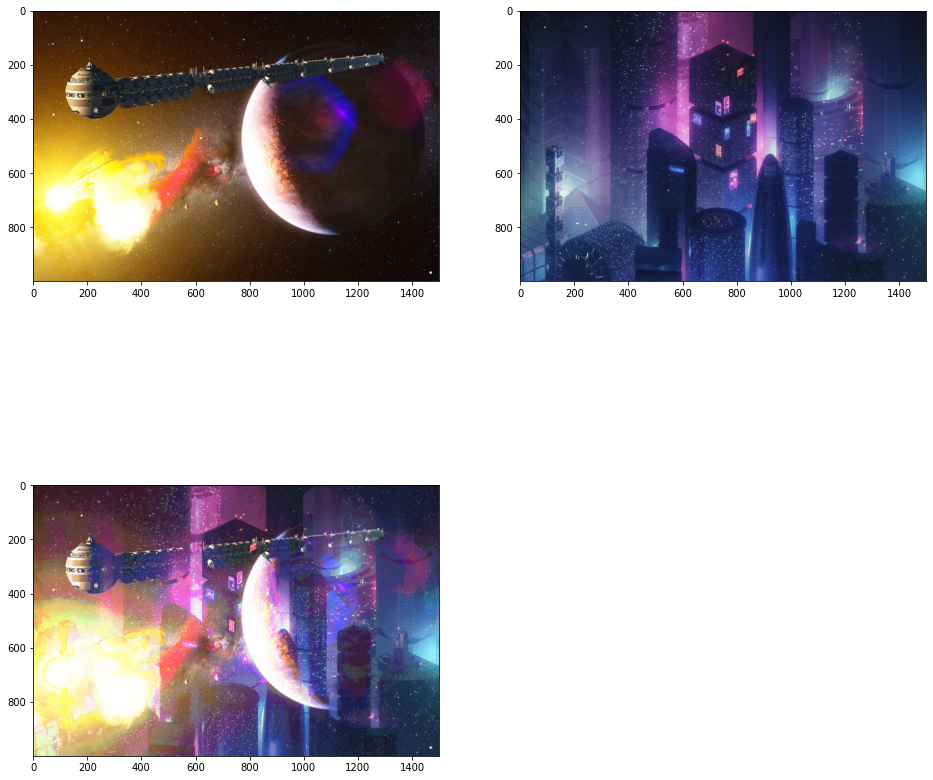

In [12]:
img_or = img1 | img2

plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.imshow(img1)
plt.subplot(2, 2, 2)
plt.imshow(img2)
plt.subplot(2, 2, 3)
plt.imshow(img_or)

## XOR


| A | B | Q |
|---|---|---|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

* Usado para detecção de mudanças nas imagens;
* Mais evidente em imagens binárias.

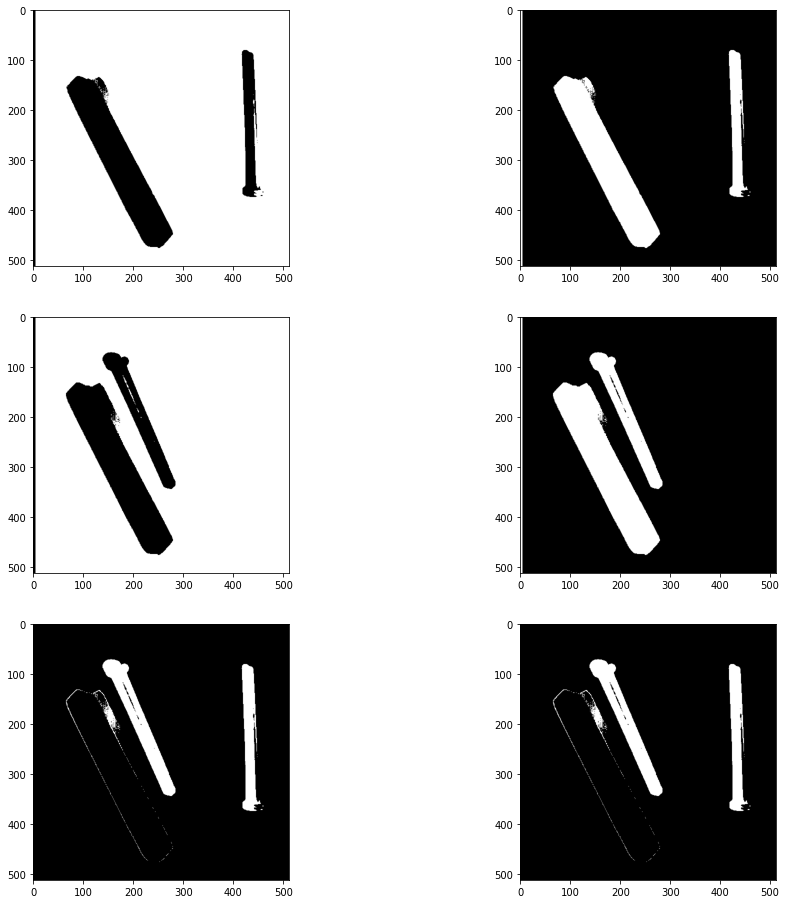

In [13]:
bin_xor = np.bitwise_xor(bin1, bin2)
# Ou:
#bin_or = bin1 ^ bin2

bin_xor_2 = bin1_not ^ bin2_not
# Ou:
#bin_or_2 = np.bitwise_xor(bin1_not, bin2_not)

plt.figure(figsize=(16, 16))
plt.subplot(3, 2, 1)
plt.imshow(bin1, cmap='gray')
plt.subplot(3, 2, 2)
plt.imshow(bin1_not, cmap='gray')

plt.subplot(3, 2, 3)
plt.imshow(bin2, cmap='gray')
plt.subplot(3, 2, 4)
plt.imshow(bin2_not, cmap='gray')

plt.subplot(3, 2, 5)
plt.imshow(bin_xor, cmap='gray')
plt.subplot(3, 2, 6)
plt.imshow(bin_xor_2, cmap='gray')

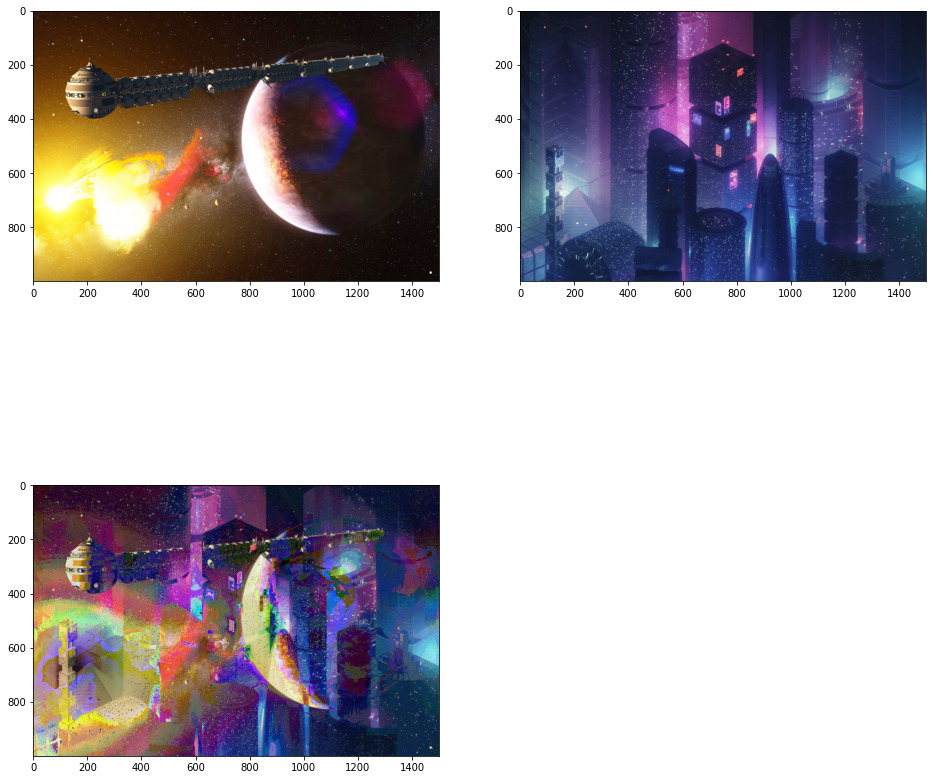

In [14]:
img_xor = img1 ^ img2

plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.imshow(img1)
plt.subplot(2, 2, 2)
plt.imshow(img2)
plt.subplot(2, 2, 3)
plt.imshow(img_xor)

## Exercícios

1. Escolha algumas imagens e realize algumas das operações desta aula nelas.

2. **(Opcional)** Realize uma operação de threshold nas imagens e repita as operações acima.

3. **(Desafio)** A pasta `Dados` contém recortes de figuras correspondentes a um dado de 6 lados. Sua tarefa é analisar as imagens dadas e combiná-las utilizando operações lógicas para formar cada uma das faces faltantes. Os lados 3, 4 e 6 são dados a você.
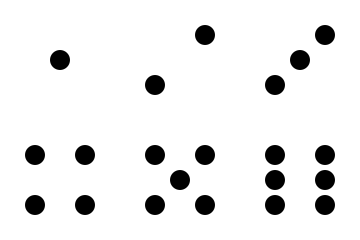

## Referências:
https://homepages.inf.ed.ac.uk/rbf/HIPR2/invert.htm

https://homepages.inf.ed.ac.uk/rbf/HIPR2/and.htm

https://homepages.inf.ed.ac.uk/rbf/HIPR2/or.htm

https://homepages.inf.ed.ac.uk/rbf/HIPR2/xor.htm

https://homepages.inf.ed.ac.uk/rbf/HIPR2/threshld.htm

https://docs.scipy.org/doc/numpy/reference/routines.bitwise.html